# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
csv = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Check the count of the number of cities
len(cities)

638

In [17]:
# Design link to be used with the API and the measurements
link = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_link = f"{link}appid={api_key}&units={units}&q="

# These 3 lines are to identify what are the terms

weather_check = requests.get(query_link + city)
weather_check_json = weather_check.json()
print(json.dumps(weather_check_json, indent=4))

{
    "coord": {
        "lon": -133.04,
        "lat": 69.45
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 6.8,
        "feels_like": -9.08,
        "temp_min": 6.8,
        "temp_max": 6.8,
        "pressure": 1003,
        "humidity": 84
    },
    "visibility": 10000,
    "wind": {
        "speed": 17.22,
        "deg": 130
    },
    "clouds": {
        "all": 75
    },
    "dt": 1606187266,
    "sys": {
        "type": 1,
        "id": 942,
        "country": "CA",
        "sunrise": 1606159742,
        "sunset": 1606168133
    },
    "timezone": -25200,
    "id": 6170031,
    "name": "Tuktoyaktuk",
    "cod": 200
}


In [23]:
# Sabo check to see if link is functioning as intended.
print(requests.get(query_link + city))

<Response [404]>


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Design 
thecity = []
state = []
temperature = []
date = []
lat = []
long = []
hum = []
cloud = []
windspeed = []

# Setup of counter to start at 1 and then continue through all of the cities listed.
processingrecord = 1

# Opening statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Designed loop to go through each city and obtain the information.
for city in cities:

# Setup what happens when it succeeds and what to say when it fails.
    try:
        response = requests.get(query_url + city).json()
        thecity.append(response["name"])
        state.append(response["sys"]["country"])
        temperature.append(response["main"]["temp_max"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        record = response["name"]
        print(f"Processing Record {processingrecord} | {record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processingrecord += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Closing statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Chokurdakh
Processing Record 2 | Busselton
Processing Record 3 | Quimper
Processing Record 4 | San Luis
Processing Record 5 | Sakakah
Processing Record 6 | Teahupoo
Processing Record 7 | George Town
Processing Record 8 | Laguna
Processing Record 9 | Kodino
Processing Record 10 | Sirte
Processing Record 11 | Tasiilaq
Processing Record 12 | Rikitea
Processing Record 13 | Sola
Processing Record 14 | Severo-Kuril'sk
Processing Record 15 | Norman Wells
Processing Record 16 | São Filipe
Processing Record 17 | Gouré
Processing Record 18 | Rawson
Processing Record 19 | Okhotsk
Processing Record 20 | Tuktoyaktuk
Processing Record 21 | Albany
Processing Record 22 | Hermanus
Processing Record 23 | Qaanaaq
Processing Record 24 | Paro
Processing Record 25 | Castro
Processing Record 26 | Port Alfred
Processing Record 27 | Hāflong
Processing Record 28 | Mezen'
Processing Record 29 | Vaini
Processing Record 30 | Saint-Pierr

City not found. Skipping...
Processing Record 236 | Lodja
City not found. Skipping...
Processing Record 237 | Leningradskiy
Processing Record 238 | Fort Nelson
Processing Record 239 | Pacific Grove
Processing Record 240 | Necochea
Processing Record 241 | Bubaque
Processing Record 242 | Kumul
Processing Record 243 | Bardsīr
Processing Record 244 | Bluff
Processing Record 245 | Cruzeiro do Sul
Processing Record 246 | Isperih
Processing Record 247 | Pitimbu
Processing Record 248 | Saint Anthony
Processing Record 249 | Ust'-Barguzin
Processing Record 250 | Katsuura
Processing Record 251 | Zaplavnoye
Processing Record 252 | Anadyr
Processing Record 253 | Grindavik
Processing Record 254 | Goundam
Processing Record 255 | São Miguel do Araguaia
Processing Record 256 | Pangai
Processing Record 257 | Mahébourg
Processing Record 258 | Shizunai-furukawachō
Processing Record 259 | Hue
Processing Record 260 | Tiksi
Processing Record 261 | San Policarpo
Processing Record 262 | Kysyl-Syr
Processing Re

Processing Record 462 | Hay River
Processing Record 463 | Miles City
Processing Record 464 | Lagoa
Processing Record 465 | Balod
Processing Record 466 | Dwārka
Processing Record 467 | Kafue
Processing Record 468 | Jequié
Processing Record 469 | Kosa
Processing Record 470 | Buraidah
Processing Record 471 | Joura
Processing Record 472 | Buchmany
Processing Record 473 | Nago
Processing Record 474 | Tongzi
Processing Record 475 | Monte Carmelo
Processing Record 476 | Ouahigouya
Processing Record 477 | Namie
Processing Record 478 | Mandalgovi
Processing Record 479 | Sur
Processing Record 480 | Beyneu
Processing Record 481 | Monroe
Processing Record 482 | Pokhara
City not found. Skipping...
Processing Record 483 | Vammala
Processing Record 484 | General Roca
Processing Record 485 | Coquimbo
Processing Record 486 | Katherine
Processing Record 487 | Salalah
Processing Record 488 | Belaya Gora
Processing Record 489 | Rørvik
Processing Record 490 | Sonqor
Processing Record 491 | Beirut
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:

# Design dataframes for the lists
weather_dict = {
    "City": cityname,
    "Country": state,
    "Temperature": temperature,
    "Date": date,
    "Lat": lat,
    "Longitude": long,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": windspeed
}

# Check the dataframe and a straight forward count.
df_weather= pd.DataFrame(weather_dict)
df_weather.count()

City           589
Country        589
Temperature    589
Date           589
Lat            589
Longitude      589
Humidity       589
Cloudiness     589
Wind Speed     589
dtype: int64

In [42]:
# Put DF into a table for visualization check
df_weather.head()

,City,Country,Temperature,Date,Lat,Longitude,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,-3.24,1606188686,70.63,147.92,93,100,4.09
1,Busselton,AU,90.00,1606188686,-33.65,115.33,23,0,16.11
2,Quimper,FR,44.60,1606188552,48.00,-4.10,100,25,3.36
3,San Luis,AR,71.58,1606188552,-33.30,-66.34,63,25,7.02
4,Sakakah,SA,51.80,1606188686,29.97,40.21,66,0,4.23


In [ ]:
#### Latitude vs. Temperature Plot

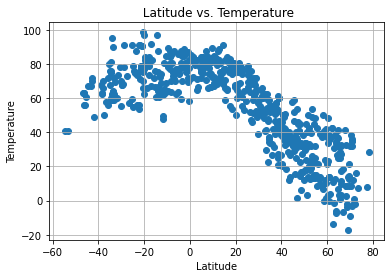

In [58]:
# Design the scatter plot
plt.scatter(df_weather["Lat"],df_weather["Temperature"])

plt.title(" Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-")

plt.show()


#### Latitude vs. Humidity Plot

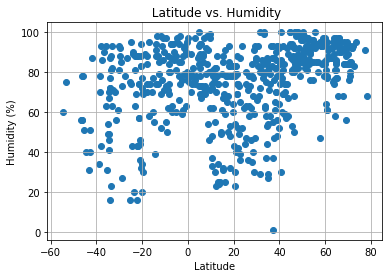

In [55]:
# Design Humidity vs. Latitude Plot
plt.scatter(df_weather["Lat"],df_weather["Humidity"])

plt.title(" Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.show()



#### Latitude vs. Cloudiness Plot

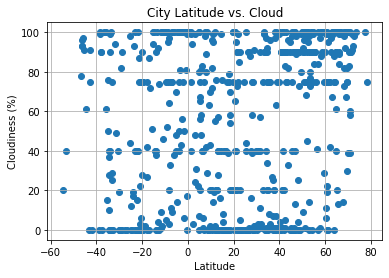

In [62]:
# Design Latitude vs. Cloudiness Plot
plt.title(" Humidity vs. Latitude")

plt.scatter(df_weather["Lat"],df_weather["Cloudiness"])

plt.title("City Latitude vs. Clouds")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-")


plt.show()

#### Latitude vs. Wind Speed Plot

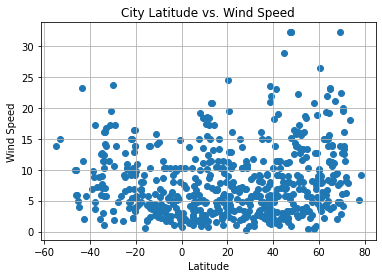

In [59]:
# Design Latitude vs. Wind Plot


plt.scatter(df_weather["Lat"],df_weather["Wind Speed"])

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.show()